In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import re
from models import *
from plot_utils import *
from math import ceil
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
plt.rcParams['figure.figsize'] = (10, 6.5)
plt.rcParams['font.size'] = 29
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['lines.markersize'] = 11
plt.rcParams['lines.linewidth'] = 4

sns.set_style('ticks')
sns.set_palette('Paired', 10)

In [21]:
rmse_df = pd.read_csv('rmse.csv')
sampling_df = pd.read_csv('timing-results/sampling-time.csv')

simdex_netflix_df = pd.read_csv('timing-results/netflix-simdex-timing.csv')
lemp_netflix_df = pd.read_csv('timing-results/netflix-lemp-timing.csv')
blocked_mm_netflix_df = pd.read_csv('timing-results/netflix-blocked_mm-timing.csv')

simdex_kdd_df = pd.read_csv('timing-results/kdd-simdex-timing.csv')
lemp_kdd_df = pd.read_csv('timing-results/kdd-lemp-timing.csv')
blocked_mm_kdd_df = pd.read_csv('timing-results/kdd-blocked_mm-timing.csv')

simdex_r2_df = pd.read_csv('timing-results/r2-simdex-timing.csv')
lemp_r2_df = pd.read_csv('timing-results/r2-lemp-timing.csv')
blocked_mm_r2_df = pd.read_csv('timing-results/r2-blocked_mm-timing.csv')

simdex_df = pd.concat([simdex_netflix_df, simdex_kdd_df, simdex_r2_df])
lemp_df = pd.concat([lemp_netflix_df, lemp_kdd_df, lemp_r2_df])
blocked_mm_df = pd.concat([blocked_mm_netflix_df, blocked_mm_kdd_df, blocked_mm_r2_df])
both_df = pd.concat([simdex_df, blocked_mm_df])

In [22]:
fexipro_df_all = pd.read_csv('timing-results/fexipro-orig-timing.csv')
fexipro_df = fexipro_df_all.query('alg == "SIR"')
fexipro_si_df = fexipro_df_all.query('alg == "SI"')

In [ ]:
simdex_df.sort_values(by='comp_time').query('K == 1').groupby(
        ['model', 'K'], as_index=False).first().drop(['num_threads','num_latent_factors',
                                                     'num_bins','sample_percentage',
                                                      'num_iters', 'parse_time'], axis=1)

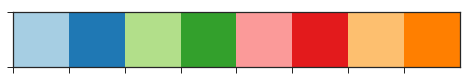

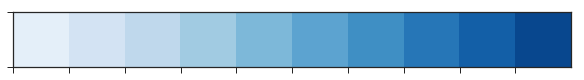

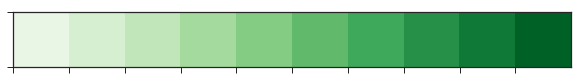

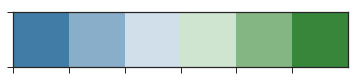

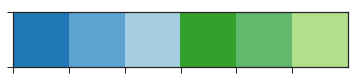

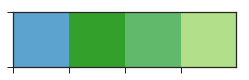

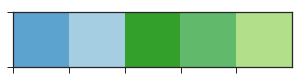

In [23]:
palette = sns.color_palette('Paired', 4)
blue_palette = sns.color_palette('Blues', 10)
green_palette = sns.color_palette('Greens', 10)
f_u_palette = [palette[1], blue_palette[-5], palette[0], palette[3], green_palette[-5], palette[2]]
# appetizer_palette = [palette[1], palette[3]]
appetizer_palette = f_u_palette[1:2] + f_u_palette[3:]
# rmse_reg_palette = [palette[1], palette[0], palette[3]]
rmse_reg_palette = [blue_palette[-5], palette[0], palette[3], green_palette[-5], palette[2]]
# rmse_reg_palette = [f_u_palette[3], f_u_palette[1], f_u_palette[4], f_u_palette[2], f_u_palette[5]]

sns.palplot(sns.color_palette('Paired', 8))
sns.palplot(sns.color_palette('Blues', 10))
sns.palplot(sns.color_palette('Greens', 10))
sns.palplot(sns.diverging_palette(240, 128, n=6))
sns.palplot(f_u_palette)
sns.palplot(appetizer_palette)
sns.palplot(rmse_reg_palette)

plot_utils.py:359: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  blocked_mm_rt['algo'] = 'Blocked MM Only'
plot_utils.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lemp_rt['algo'] = 'LEMP'
plot_utils.py:365: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fexipro_rt['algo'] = 'FEXIPRO'
plot_utils.py:368: Setting

nomad-Netflix-25-reg-0.05 0.0200669406036
nomad-Netflix-50-reg-0.05 0.0213654489617
nomad-R2-25-reg-0.001 0.0112089707501
nomad-R2-50-reg-0.001 0.0156495061814
nomad-KDD-25-reg-0.001 0.00321696658823
nomad-KDD-50-reg-1 0.0065704852648
Average speedup: 1.37496875929
Min speedup: 0.756029927127
Max speedup: 2.3877893656
Average overhead: 5.76651978333
Min overhead: 0.4873057
Max overhead: 22.01821
Average percent overhead: 0.0130130530583
Min percent overhead: 0.00321696658823
Max percent overhead: 0.0213654489617


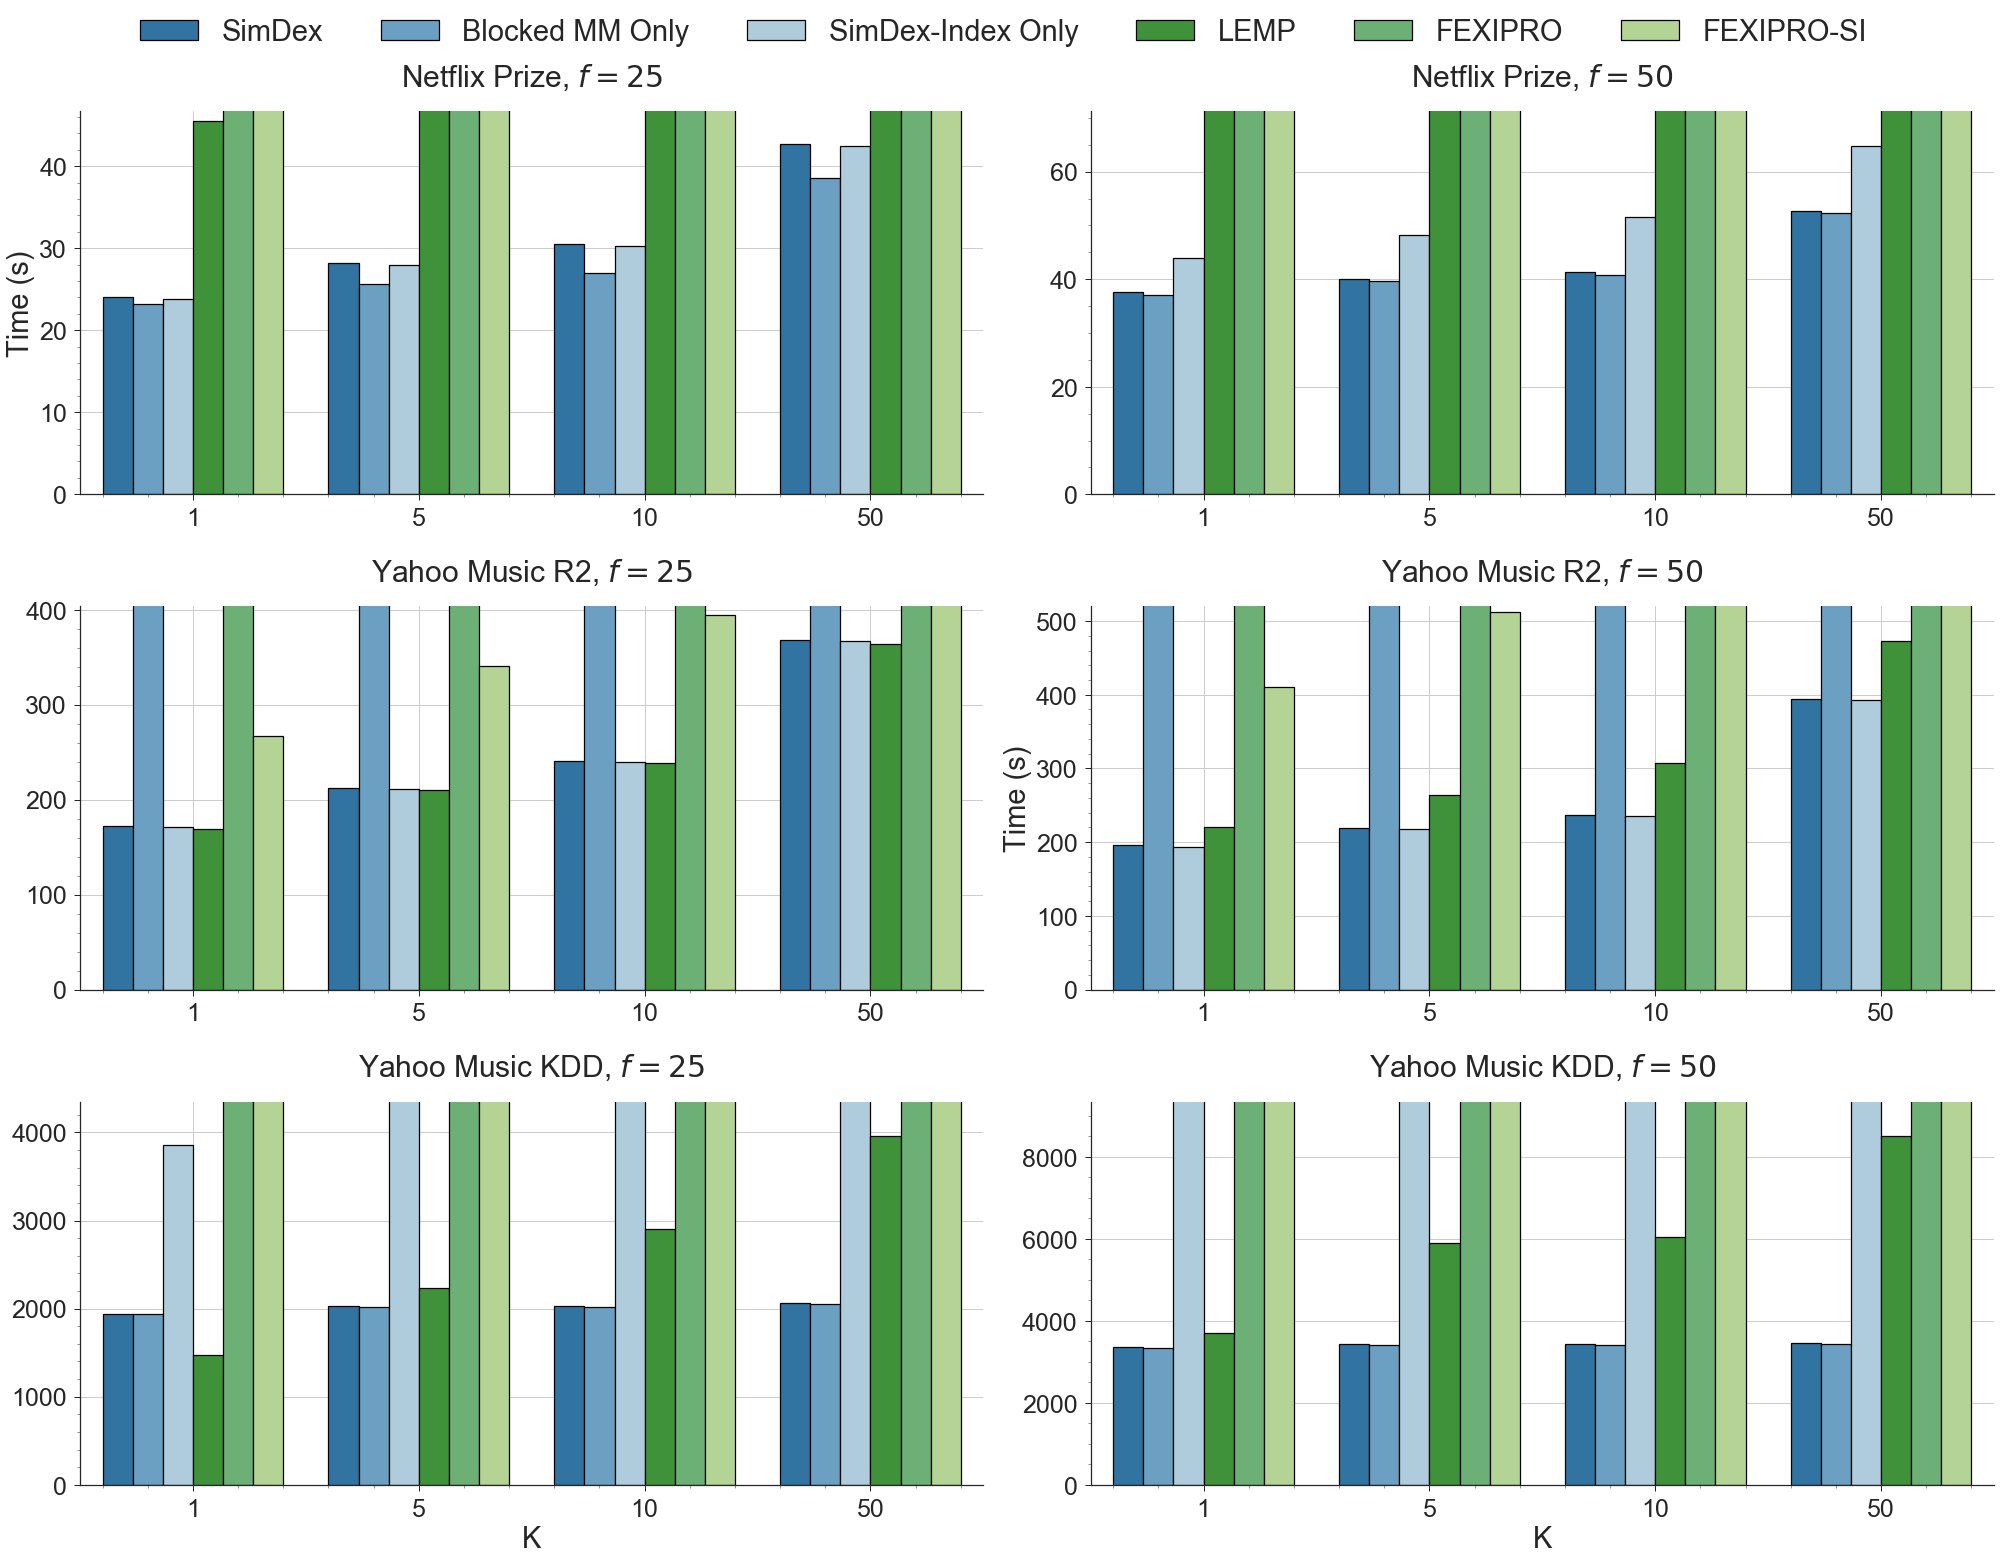

In [33]:
with sns.color_palette(f_u_palette):
    f_u_plots(simdex_df, lemp_df, blocked_mm_df, fexipro_df, fexipro_si_df, sampling_df, BLOG_POST_MODELS,
          figsize=(28, 21), bbox_to_anchor=(0,0,1, 1.04), nrows=3)

plot_utils.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  blocked_mm_rt['algo'] = 'Blocked MM'
plot_utils.py:147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lemp_rt['algo'] = 'LEMP'
plot_utils.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  fexipro_rt['algo'] = 'FEXIPRO'
plot_utils.py:153: SettingWithC

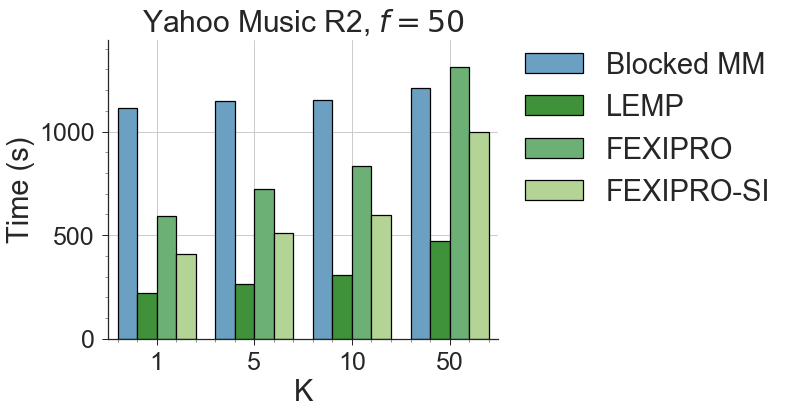

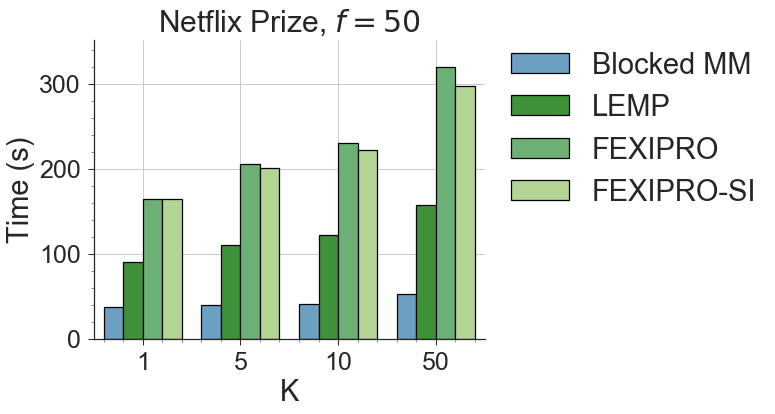

In [34]:
with sns.color_palette(appetizer_palette):
    blocked_mm_lemp_fexipro_plot(blocked_mm_df, lemp_df, fexipro_df, fexipro_si_df,
                             'nomad-R2-50-reg-0.001', y_title=1.01, figsize=(7, 5.5), title=r'Yahoo Music R2, $f=50$')
    blocked_mm_lemp_fexipro_plot(blocked_mm_df, lemp_df, fexipro_df, fexipro_si_df,
                             'nomad-Netflix-50-reg-0.05', y_title=1.01, figsize=(7, 5.5),
                             title=r'Netflix Prize, $f=50$')

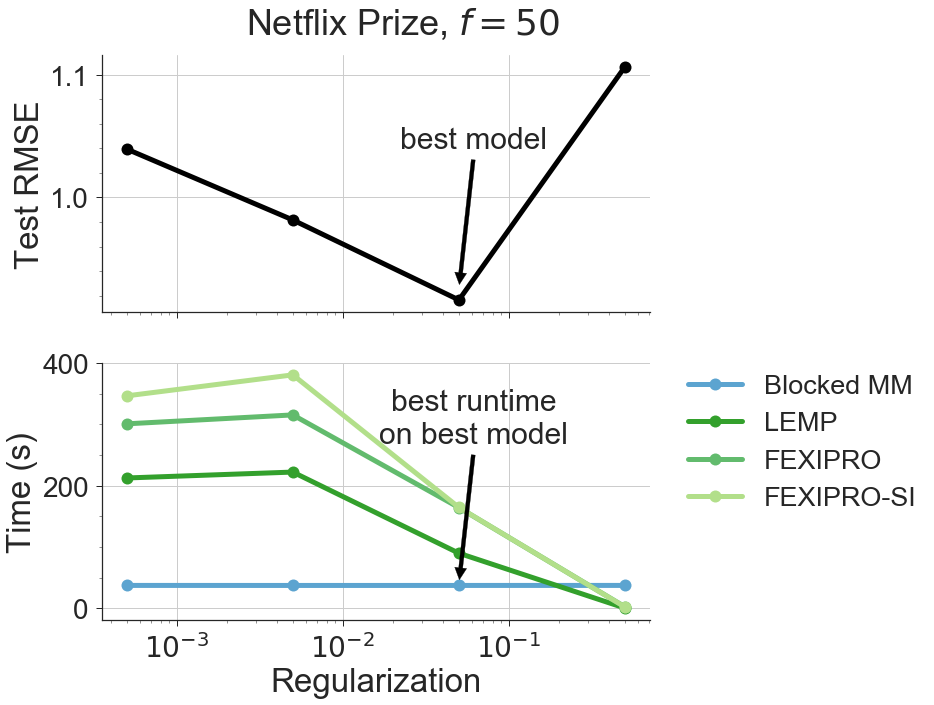

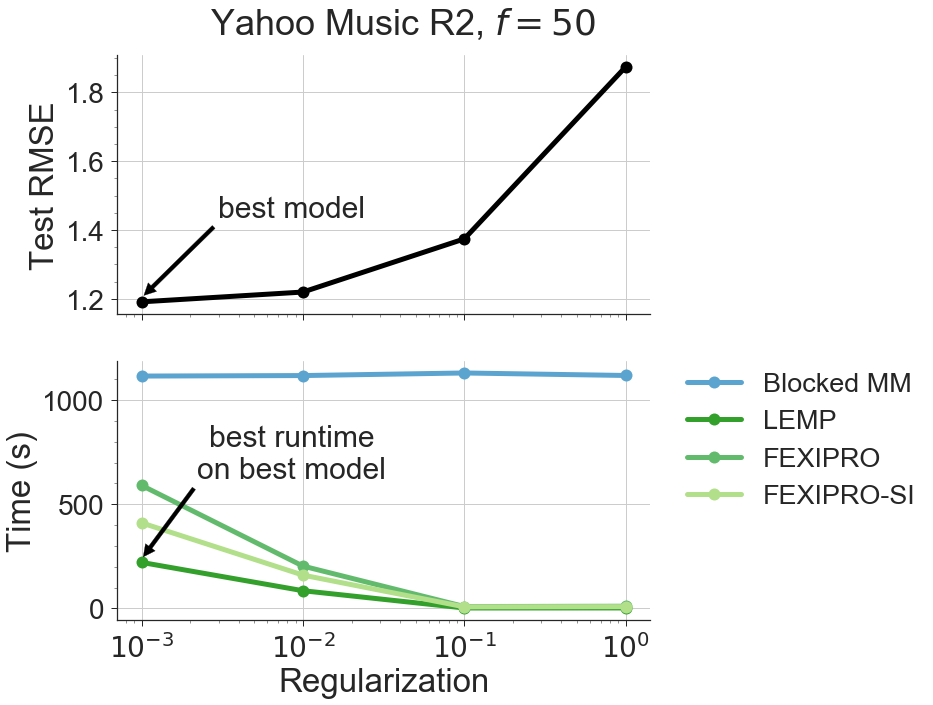

In [35]:
# custom settings for the line plots
plt.rcParams['font.size'] = 33
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['figure.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 33
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams['legend.fontsize'] = 27
plt.rcParams['lines.markersize'] = 12
plt.rcParams['lines.linewidth'] = 5

appetizer_models = [
    ('nomad-Netflix-50', NETFLIX_REGS, (15, 135), r'Netflix Prize, $f=50$'),
    ('nomad-R2-50', R2_REGS, (150, 75), r'Yahoo Music R2, $f=50$')    
]

all_models = appetizer_models + [
    ('nomad-Netflix-100', NETFLIX_REGS, (15, 150), r'Netflix Prize, $f=100$'),
    ('nomad-R2-100', R2_REGS, (15, 150), r'Yahoo Music R2, $f=100$'),
]
for add_simdex in [False]:
    models = all_models if add_simdex else appetizer_models
    _palette = rmse_reg_palette if add_simdex else appetizer_palette
    for model_prefix, regs, xy_text, title_text in models[:2]:
        _simdex_df = simdex_df if add_simdex else None
        fname = 'appetizer-' + model_prefix if not add_simdex else None
        with sns.color_palette(_palette):
            rmse_and_reg_plots(blocked_mm_df, lemp_df, rmse_df, model_prefix, regs,
                               simdex_df=_simdex_df, fexipro_df=fexipro_df, fexipro_si_df=fexipro_si_df,
                               fname=fname, figsize=(10, 10),
                               bbox_to_anchor=(0,0,1,1.05), title=True, title_text=title_text, 
                               y_title=1.01, annotate=not add_simdex, xy_text=xy_text, linestyle='-',
                               include_legend=True)
#             rmse_and_reg_legend(add_simdex)
     
# return to normal
plt.rcParams['font.size'] = 29
plt.rcParams['font.weight'] = 500
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['figure.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4        
sns.set_palette('Paired', 10)


In [ ]:
plt.rcParams['axes.titlesize'] = 23
plt.rcParams['legend.fontsize'] = 21
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 21
num_clusters_vs_runtime(simdex_df, ['lemp-paper-Netflix-noav-50',
                                    'nomad-Netflix-50-reg-0.05',
                                    'nomad-KDD-10-reg-1',
                                    'nomad-R2-10-reg-0.001',
                                   ], figsize=(25, 5), y_title=-0.3,
                            bbox_to_anchor=(0,0,1,1.05), min_value=1, max_value=1024)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 29
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 29

In [ ]:
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['lines.linewidth'] = 6
with sns.color_palette(f_u_palette):
    point_query_time(['lemp-paper-Netflix-noav-50', 'nomad-Netflix-50-reg-0.05',
                      'nomad-R2-50-reg-0.001', 'nomad-KDD-50-reg-1'], csv_dir='point-query-stats/',
                     figsize=(32, 6.5), sample_fraction=1.0, y_title=-0.38)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['lines.linewidth'] = 4

In [ ]:
plt.rcParams['font.size'] = 25
plt.rcParams['axes.titlesize'] = 26
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 17
plt.rcParams['ytick.labelsize'] = 17
plt.rcParams['legend.fontsize'] = 17
plt.rcParams['lines.markersize'] = 11
plt.rcParams['lines.linewidth'] = 2.50

factor_analysis(figsize=(8,4))